In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import timeit
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score ,r2_score 
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import dataset.
df = pd.read_csv('D:\\DATA SETS\\Admission_Predict_Ver1.1 (1).csv',sep = ",")
df.head() 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Check for null values.
df.isnull().sum()

# Drop 'Serial No.'
df = df.drop('Serial No.',axis=1)

# Renaming columns.
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ','_')

In [4]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [5]:
# Check if the data types are correct as per the meaning of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE_Score            500 non-null int64
TOEFL_Score          500 non-null int64
University_Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance_of_Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
# Descriptive statistics.
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


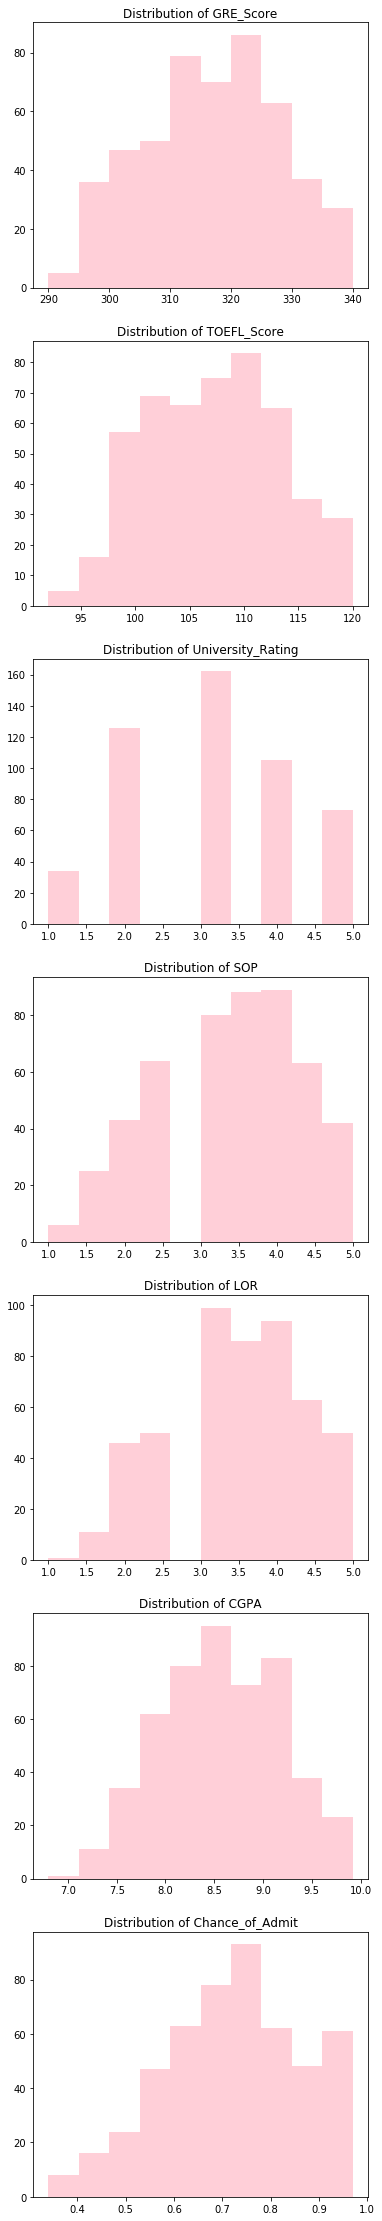

In [7]:
cols = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Chance_of_Admit']

plt.figure(figsize=(6,40))

for i in range(len(cols)):
    plt.subplot(7,1,i+1)
    plt.hist(df[cols[i]],color='pink',alpha=0.75)
    plt.title("Distribution of " + cols[i])

plt.show()

From the above GRE_Score, TOEFL_Score and CGPA are some what normally distributed and the target variable 'Chance_of_Admit' is left skewed.<br/>
Let us observe the correlation between the target variable and independent variables.

Above plots show that there is a linear relation between target variable and GRE_Score, TOEFL_Score and CGPA. However, let us statistically confirm this using a correlation matrix.

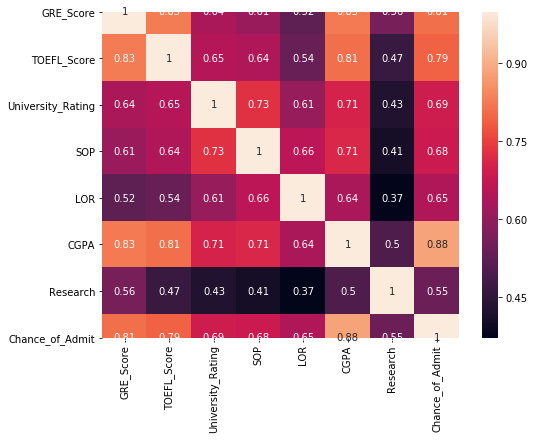

In [8]:
# Visualize correlation between independant variables and the target variable. Here, the target variable is 'Chance_of_Admit'
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [9]:
# Correlation factors for 'Chance_of_Admit'.
df.corr()['Chance_of_Admit'].sort_values(ascending=False)

Chance_of_Admit      1.000000
CGPA                 0.882413
GRE_Score            0.810351
TOEFL_Score          0.792228
University_Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance_of_Admit, dtype: float64

It is clear that CGPA has highest correlation with Chance_of_Admit followed by GRE_Score and TOEFL_Score. <br/>
Also, there is a little correlation of University_Rating, SOR and LOR with the target variable.

<b><font color='blue'>Simple Linear Regression with OLS(Ordinary Least Squares).<br/></b>

In [10]:
from sklearn import linear_model

X = df.drop(['Chance_of_Admit','Research'],axis = 1)
Y = df['Chance_of_Admit']

model = linear_model.LinearRegression()
model.fit(X,Y)

print('\nCoefficients: \n', model.coef_)
print('\nIntercept: \n', model.intercept_)


Coefficients: 
 [0.00238687 0.00262459 0.00671581 0.00192478 0.01770008 0.11924858]

Intercept: 
 -1.4267753302791624


<b>Linear regression equation with coefficients and intercept(from the above result) would be:</b><br/>
Chance_of_Admit = 0.00227608GRE_Score + 0.00275344TOEFL_Score + 0.00606202University_Rating - 0.0019614SOP + 0.0227486LOR + 0.11987489CGPA - 1.4138594435308127<br/>

But we are more interested in identifying the significance of these coefficients. We can determine this using Statistical T-test. Let us use "statsmodels" to get T-test, p values and many other statistical information.

<b><font color='blue'>Model1:<font/> Linear Regression using statsmodels

<b>Interpreting estimated coefficients.

In [11]:
import statsmodels.api as sm

# We need to manually add a constant in statsmodels' sm
X = df.drop(['Chance_of_Admit','Research'],axis = 1)
Y = df['Chance_of_Admit']

X = sm.add_constant(X)
model1 = sm.OLS(Y, X).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     366.8
Date:                Mon, 14 Oct 2019   Prob (F-statistic):          3.22e-178
Time:                        14:19:34   Log-Likelihood:                 694.60
No. Observations:                 500   AIC:                            -1375.
Df Residuals:                     493   BIC:                            -1346.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4268      0.097    -14.695      0.000      -1.618      -1.236
GRE_Score             0.0024      0.000      4.897      0.000       0.001       0.003
TOEFL_Score           0.0026      0.001      2.974      0.003       0.001       0.004
University_Rating     0.0067      0.004      1.747      0.081      -0.001       0.014
SOP                   0.0019      0.005      0.417      0.677      -0.007       0.011
LOR                   0.0177      0.004      4.231      0.000       0.009       0.026
CGPA                  0.1192      0.010     12.137      0.000       0.100       0.139
==============================================================================
Omnibus:                      119.023   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.923
Skew:                          -1.187   Prob(JB):                     7.46e-66
Kurtosis:                       5.959   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above, p-values of GRE_Score, TOEFL_Score, LOR and CGPA are less than 0.05 and p-values of University_Rating and SOP are greater than 0.05.<br/>
This implies that the coefficient of University_Rating and SOP are effectively zero from a statistical point of view. They are simply not significant, and we can say that it appears to be no relationship between Chance_of_Admit and the features (University_Rating, SOP). <br/>

Let us remove these 2 variables and see if there is an improvement in the model or not.

<b><font color='blue'>Model2:<font/> Remove University_Rating and SOP

In [12]:
X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP'],axis = 1)
Y = df['Chance_of_Admit']

X = sm.add_constant(X)
model2 = sm.OLS(Y, X).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     546.5
Date:                Mon, 14 Oct 2019   Prob (F-statistic):          5.14e-180
Time:                        14:19:34   Log-Likelihood:                 692.40
No. Observations:                 500   AIC:                            -1375.
Df Residuals:                     495   BIC:                            -1354.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.5017      0.090    -16.648      0.000      -1.679      -1.324
GRE_Score       0.0024      0.000      5.011      0.000       0.001       0.003
TOEFL_Score     0.0029      0.001      3.315      0.001       0.001       0.005
LOR             0.0206      0.004      5.372      0.000       0.013       0.028
CGPA            0.1246      0.009     13.227      0.000       0.106       0.143
==============================================================================
Omnibus:                      114.669   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.010
Skew:                          -1.153   Prob(JB):                     3.51e-62
Kurtosis:                       5.876   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<b>Evaluating performance by comparing <font color='blue'>model1</font> and <font color='blue'>model2

- We can use an F-test to compare two models if one of them is nested within the other. That is, if the feature set in a model is a subset of the feature set of the other, then we can use F-test. In this case, we say that the model with higher F statistic is superior to the other one.
- We can also use adjusted R-squared. The higher adjusted R-squared, the better the model explains the target variable.
- Using information criteria is also a common way of comparing different models and selecting the best one. Here, the two information criteria are Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC). Both take into consideration the sum of the squared errors (SSE), the sample size, and the number of parameters. The lower AIC and BIC, the better the model explains the target variable.

In [13]:
performance_stats = pd.DataFrame()

# This information is drawn from model1 and model2 summary tables above.
performance_stats['F-statistic'] = [259.9,389.9]
performance_stats['Adj_R-squared'] = [0.796,0.796]
performance_stats['AIC'] = [-1051,-1054]
performance_stats['BIC'] = [-1023,-1034]

performance_stats

,F-statistic,Adj_R-squared,AIC,BIC
0,259.9,0.796,-1051,-1023
1,389.9,0.796,-1054,-1034


From the above, we observe that model2 is slightly better than model1(based on the 3 rules from the bullet points). <br/>
The target variable(Chance_of_Admit) is skewed. Let us transform it to a normal distribution and test the model again.

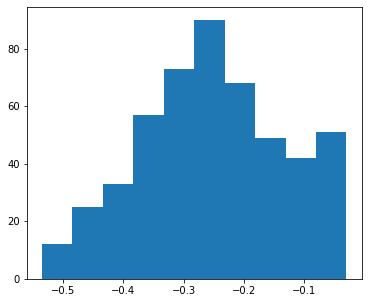

In [14]:
# Transform to normal distribution using boxcox transformation.
from scipy.stats import boxcox
boxcox_Chance_of_Admit,_ = boxcox(df['Chance_of_Admit'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_Chance_of_Admit)
plt.show()


Still it is NOT a complete normal distribution but some what better than before. Let us rerun the model with the transformed target variable.

<b><font color='blue'>Model3: <font/>Apply boxcox transformation to the target variable.

In [15]:
df['boxcox_Chance_of_Admit'] = boxcox_Chance_of_Admit

X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP','boxcox_Chance_of_Admit'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

X = sm.add_constant(X)
model3 = sm.OLS(Y, X).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     boxcox_Chance_of_Admit   R-squared:                       0.831
Model:                                OLS   Adj. R-squared:                  0.830
Method:                     Least Squares   F-statistic:                     609.2
Date:                    Mon, 14 Oct 2019   Prob (F-statistic):          1.31e-189
Time:                            14:19:35   Log-Likelihood:                 804.38
No. Observations:                     500   AIC:                            -1599.
Df Residuals:                         495   BIC:                            -1578.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.1377      0.072    -29.647      0.000      -2.279      -1.996
GRE_Score       0.0021      0.000      5.305      0.000       0.001       0.003
TOEFL_Score     0.0026      0.001      3.740      0.000       0.001       0.004
LOR             0.0168      0.003      5.491      0.000       0.011       0.023
CGPA            0.1041      0.008     13.832      0.000       0.089       0.119
==============================================================================
Omnibus:                      104.256   Durbin-Watson:                   0.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.695
Skew:                          -1.077   Prob(JB):                     5.42e-53
Kurtosis:                       5.629   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# These values are taken from the above summary tables for model1, model2 and model3.
performance_statistics = pd.DataFrame()
performance_statistics['F-statistic'] = [259.9,389.9,443.2]
performance_statistics['Adj_R-squared'] = [0.796,0.796,0.816]
performance_statistics['AIC'] = [-1051,-1054,-1272]
performance_statistics['BIC'] = [-1023,-1034,-1252]

performance_statistics['Model'] = ['model1','model2','model3']
performance_statistics.set_index('Model')

,F-statistic,Adj_R-squared,AIC,BIC
Model,,,,
model1,259.9,0.796,-1051,-1023
model2,389.9,0.796,-1054,-1034
model3,443.2,0.816,-1272,-1252


Wow!! After transforming target variable to normal distribution, model3's performance stats have been improved.<br/>
It's time to make predictions now.

<b><font color='blue'>Model4: Making predictions.

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP','boxcox_Chance_of_Admit'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)
X_train = sm.add_constant(X_train)

model4 = sm.OLS(y_train, X_train).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     boxcox_Chance_of_Admit   R-squared:                       0.829
Model:                                OLS   Adj. R-squared:                  0.827
Method:                     Least Squares   F-statistic:                     478.0
Date:                    Mon, 14 Oct 2019   Prob (F-statistic):          7.01e-150
Time:                            14:19:35   Log-Likelihood:                 643.41
No. Observations:                     400   AIC:                            -1277.
Df Residuals:                         395   BIC:                            -1257.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.1499      0.080    -26.955      0.000      -2.307      -1.993
GRE_Score       0.0022      0.000      5.088      0.000       0.001       0.003
TOEFL_Score     0.0023      0.001      2.967      0.003       0.001       0.004
LOR             0.0160      0.003      4.717      0.000       0.009       0.023
CGPA            0.1045      0.008     12.521      0.000       0.088       0.121
==============================================================================
Omnibus:                       84.831   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.828
Skew:                          -1.102   Prob(JB):                     3.29e-40
Kurtosis:                       5.460   Cond. No.                     1.09e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

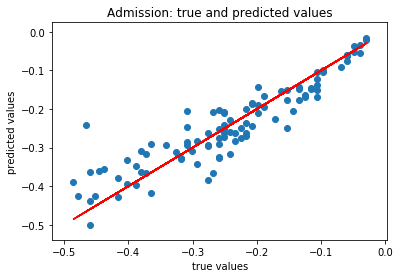

In [18]:
# We add constant to the model as it's a best practice to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = model4.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Admission: true and predicted values")
plt.show()

In the graph, we see that our model predicts the higher values of the target better than the lower values. By using visualizations like this, we can more intuitively understand the performance of the models. But, we need to find more accurate ways of assessing our models. Let us find out some metrics to evaluate how good the predictions are. Below are those metrics.

In [19]:
rmse_ols = rmse(y_test, y_preds)

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse_ols))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


Mean absolute error of the prediction is: 0.03528185285876723
Mean squared error of the prediction is: 0.002349937474342915
Root mean squared error of the prediction is: 0.048476153666962014
Mean absolute percentage error of the prediction is: 16.198037726363303


<b><font color='blue'>Model5: <font/>Apply boxcox transformation to the features.

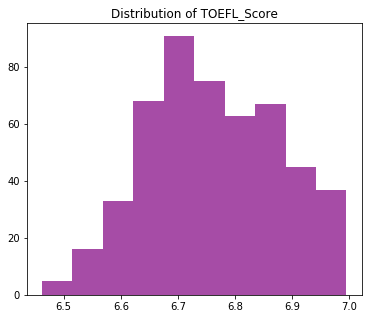

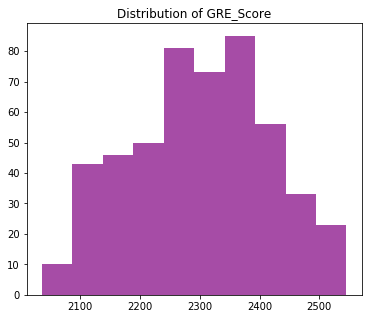

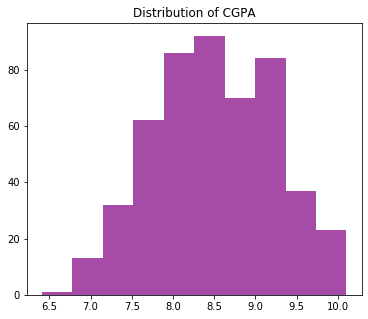

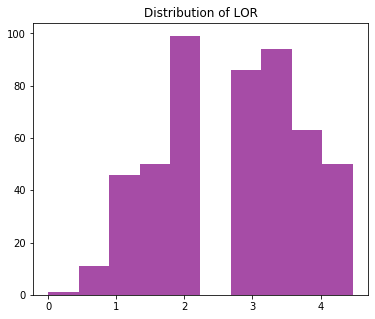

In [20]:
# Transform to normal distribution using boxcox transformation.
boxcox_TOEFL_Score,_ = boxcox(df['TOEFL_Score'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_TOEFL_Score,color='purple',alpha=0.70)
plt.title("Distribution of TOEFL_Score")
plt.show()

boxcox_GRE_Score,_ = boxcox(df['GRE_Score'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_GRE_Score,color='purple',alpha=0.70)
plt.title("Distribution of GRE_Score")
plt.show()

boxcox_CGPA,_ = boxcox(df['CGPA'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_CGPA,color='purple',alpha=0.70)
plt.title("Distribution of CGPA")
plt.show()

boxcox_LOR,_ = boxcox(df['LOR'])
plt.figure(figsize=(6,5))
plt.hist(boxcox_LOR,color='purple',alpha=0.70)
plt.title("Distribution of LOR")
plt.show()

In [21]:
df['boxcox_TOEFL_Score'] = boxcox_TOEFL_Score
df['boxcox_GRE_Score'] = boxcox_GRE_Score
df['boxcox_CGPA'] = boxcox_CGPA
df['boxcox_LOR'] = boxcox_LOR

In [22]:
X1 = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y1 = df['boxcox_Chance_of_Admit']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 450)
X_train1 = sm.add_constant(X_train1)

model5 = sm.OLS(y_train1, X_train1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     boxcox_Chance_of_Admit   R-squared:                       0.829
Model:                                OLS   Adj. R-squared:                  0.827
Method:                     Least Squares   F-statistic:                     478.6
Date:                    Mon, 14 Oct 2019   Prob (F-statistic):          5.61e-150
Time:                            14:19:37   Log-Likelihood:                 643.63
No. Observations:                     400   AIC:                            -1277.
Df Residuals:                         395   BIC:                            -1257.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.3407      0.215    -10.870      0.000      -2.764      -1.917
boxcox_TOEFL_Score     0.1174      0.041      2.878      0.004       0.037       0.198
boxcox_GRE_Score       0.0002   4.27e-05      5.159      0.000       0.000       0.000
boxcox_CGPA            0.0882      0.007     12.532      0.000       0.074       0.102
boxcox_LOR             0.0141      0.003      4.729      0.000       0.008       0.020
==============================================================================
Omnibus:                       84.402   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.308
Skew:                          -1.098   Prob(JB):                     7.02e-40
Kurtosis:                       5.449   Cond. No.                     2.07e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

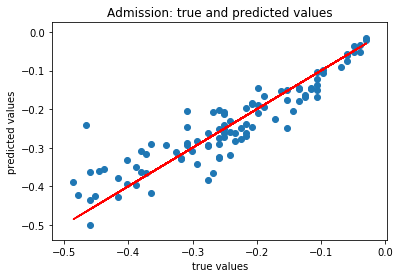

In [23]:
# We add constant to the model as it's a best practice to do so every time!
X_test1 = sm.add_constant(X_test1)

# We are making predictions here
y_preds1 = model5.predict(X_test1)

plt.scatter(y_test1, y_preds1)
plt.plot(y_test1, y_test1, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Admission: true and predicted values")
plt.show()

In [24]:
rmse_ols_Nor_dist = rmse(y_test1, y_preds1)

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test1, y_preds1)))
print("Mean squared error of the prediction is: {}".format(mse(y_test1, y_preds1)))
print("Root mean squared error of the prediction is: {}".format(rmse_ols_Nor_dist))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test1 - y_preds1) / y_test1)) * 100))


Mean absolute error of the prediction is: 0.035311271041709016
Mean squared error of the prediction is: 0.002349193048444316
Root mean squared error of the prediction is: 0.04846847478974675
Mean absolute percentage error of the prediction is: 16.254787365025717


In [25]:
print("Root mean squared error of MODEL4 and MODEL5 are {}  and  {}".format(rmse(y_test, y_preds),rmse(y_test1, y_preds1)))
print("Root mean squared error of MODEL4 and MODEL5 are {}  and  {}".format(r2_score(y_test, y_preds),r2_score(y_test1, y_preds1)))

Root mean squared error of MODEL4 and MODEL5 are 0.048476153666962014  and  0.04846847478974675
Root mean squared error of MODEL4 and MODEL5 are 0.8378367770341293  and  0.8378881479766731


We can observe that RMSE for model5 is slightly decreased due to transforming independent variables(features) to normal distributions.

In [26]:
r2_ols=r2_score(y_test, y_preds)
print(r2_ols)

0.8378367770341293


<b><font color='blue'>Linear Regression

In [27]:
X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

lireg = linear_model.LinearRegression()
lireg.fit(X_train,y_train)
pred_test = lireg.predict(X_test)

rmse_lireg = rmse(y_test, pred_test)
r2_lireg=r2_score(y_test, pred_test)

print("RMSE for the prediction of test data is",rmse_lireg)
print("reg Score is : ",lireg.score(X, Y))
print("r_square score for the prediction of test data is: ", r2_lireg)

RMSE for the prediction of test data is 0.048468474789743504
reg Score is :  0.8311872595299465
r_square score for the prediction of test data is:  0.8378881479766949


<b><font color='blue'>KNN Regressor

In [28]:
# KNN Regression model with cross validation.
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

score = cross_val_score(knn, X, Y, cv=5)
print("Score : ",score)
print("mean : ", np.mean(score))

Score :  [0.57623594 0.69341831 0.69349475 0.7735445  0.7178661 ]
mean :  0.6909119189409477


In [29]:
# KNN Regression model with weights parameter.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10,weights='distance')

X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

score = cross_val_score(knn_w, X, Y, cv=5)
print("Score : ",score)
print("mean : ", np.mean(score))

Score :  [0.60282205 0.65253808 0.72042916 0.75298746 0.75118131]
mean :  0.6959916111001471


In [30]:
# KNN Regression model with RMSE
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

knn.fit(X_train,y_train)
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

rmse_knn = rmse(y_test, pred_test)
r2_knn = r2_score(y_test, pred_test)
print("RMSE for the prediction of test data is",rmse_knn)
print("knn Score is : ",knn.score(X, Y))
print("r2_score for the prediction of test data is",r2_knn)

RMSE for the prediction of test data is 0.06421961920482963
knn Score is :  0.757332372280462
r2_score for the prediction of test data is 0.715402217140872


<b><font color='blue'>Decision tree Regressor

In [31]:
X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

dct =DecisionTreeRegressor()
dct.fit(X_train,y_train)
y_pred = dct.predict(X_test)

rmse_dct = rmse(y_test, y_pred)
r2_dct = r2_score(y_test, pred_test)

print("RMSE is : ",rmse_dct)
print("Decision Tree Score is : ",dct.score(X, Y))
print("r2_score is: ",r2_dct)

RMSE is :  0.06773888406124486
Decision Tree Score is :  0.9339285478627207
r2_score is:  0.715402217140872


<b><font color='blue'>Random Forest Regressor

In [32]:
X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

rfreg = RandomForestRegressor(max_depth=4, random_state=42, n_estimators=100)
rfreg.fit(X_train,y_train)
y_pred = rfreg.predict(X_test)

rmse_rf = rmse(y_test, y_pred)
r2_rf = r2_score(y_test, pred_test)

print("RMSE is : ",rmse_rf)
print("Cross validation score is : ",cross_val_score(rfreg, X, Y, cv=5))
print("Random Forest Score is : ",rfreg.score(X, Y))
print("r2_score is: ",r2_rf)

RMSE is :  0.052754897364776315
Cross validation score is :  [0.69896192 0.77364388 0.87988612 0.81144385 0.88290161]
Random Forest Score is :  0.851346346677391
r2_score is:  0.715402217140872


<b><font color='blue'>SVM Regressor

In [33]:
from sklearn.svm import SVR

X = df.drop(['Chance_of_Admit','Research','University_Rating','SOP',
             'TOEFL_Score','GRE_Score','CGPA','boxcox_Chance_of_Admit','LOR'],axis = 1)
Y = df['boxcox_Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

svr = SVR()
svr.fit(X_train,y_train)
pred = svr.predict(X_test)

rmse_svr = rmse(y_test, pred)
r2_svr =r2_score(y_test, pred)
print("SVR Score is : ",svr.score(X, Y))
print("Cross validation score is : ",cross_val_score(svr, X, Y, cv=5))
print("mean of Crose validation : ",cross_val_score(svr, X, Y, cv=5).mean())
print("RMSE is : ",rmse_svr)
print("r2_score is : ",r2_svr)


SVR Score is :  0.6837779782033816
Cross validation score is :  [0.46461386 0.4718187  0.61584425 0.53727463 0.58983805]
mean of Crose validation :  0.5358778971470488
RMSE is :  0.07403542560179718
r2_score is :  0.6217532414452551


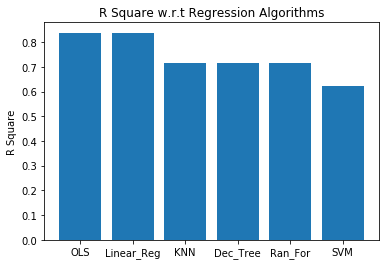

In [34]:
y = [r2_ols,r2_lireg,r2_knn,r2_dct,r2_rf,r2_svr]
x = ['OLS','Linear_Reg','KNN','Dec_Tree','Ran_For','SVM']
plt.bar(x,y)
plt.ylabel("R Square")
plt.title("R Square w.r.t Regression Algorithms")
plt.show()

# Classification

<b><font color='blue'>Logistic Regression

Let us change the column 'Chance_of_Admit' so that it holds boolean values(0 and 1) in order to use it for classification.

Here on, when ever I create a classification model, I use the dataframe "data" which holds boolean value for 'Chance_of_Admit'.
When I create a regression model, I use the original data frame "df".

In [35]:
data = df[['GRE_Score','TOEFL_Score','University_Rating','CGPA','SOP','LOR','Chance_of_Admit']]
data.loc[data['Chance_of_Admit']>=0.80,'Chance_of_Admit'] = 1
data.loc[data['Chance_of_Admit']<0.80,'Chance_of_Admit'] = 0
data['Chance_of_Admit'] = data['Chance_of_Admit'].astype('int')

In [36]:
from sklearn.linear_model import LogisticRegression

X = data.drop(['Chance_of_Admit','University_Rating','SOP'],axis = 1)
Y = data['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 450)

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predict_test_logreg = logreg.predict(X_test)

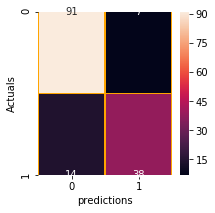

precision_score:  0.8444444444444444
recall_score:  0.7307692307692307
f1_score:  0.7835051546391751
Accuracy Score:   0.86


In [37]:
# Confusion matrix

cm_logreg = confusion_matrix(y_test,predict_test_logreg)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_logreg,annot = True,linewidths=0.5,linecolor="orange",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

acu_score_logreg = accuracy_score(y_test,predict_test_logreg)
score_logreg = logreg.score(X_test,y_test)

print("precision_score: ", precision_score(y_test,predict_test_logreg))
print("recall_score: ", recall_score(y_test,predict_test_logreg))
print("f1_score: ",f1_score(y_test,predict_test_logreg))
print("Accuracy Score:  ",acu_score_logreg)

<b><font color='blue'>KNN Classifier 

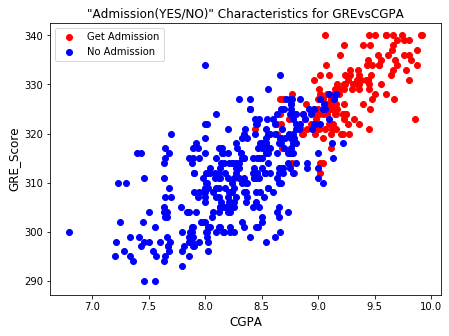

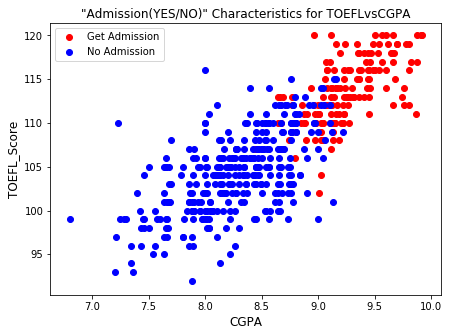

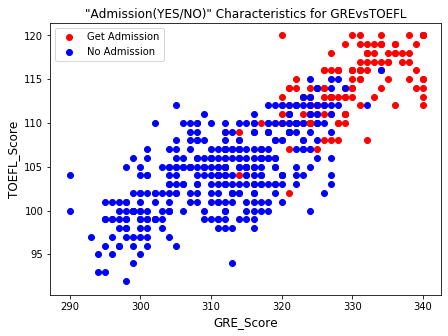

In [38]:
# Look at our data.
plt.figure(figsize=(7,5))

plt.scatter(
    data[data['Chance_of_Admit'] == 1].CGPA,
    data[data['Chance_of_Admit'] == 1].GRE_Score,
    color='red'
)
plt.scatter(
    data[data['Chance_of_Admit'] == 0].CGPA,
    data[data['Chance_of_Admit'] == 0].GRE_Score,
    color='blue'
)

plt.legend(['Get Admission', 'No Admission'])
plt.title('"Admission(YES/NO)" Characteristics for GREvsCGPA',fontsize=12)
plt.xlabel('CGPA',fontsize=12)
plt.ylabel('GRE_Score',fontsize=12)
plt.show()


plt.figure(figsize=(7,5))

plt.scatter(
    data[data['Chance_of_Admit'] == 1].CGPA,
    data[data['Chance_of_Admit'] == 1].TOEFL_Score,
    color='red'
)
plt.scatter(
    data[data['Chance_of_Admit'] == 0].CGPA,
    data[data['Chance_of_Admit'] == 0].TOEFL_Score,
    color='blue'
)

plt.legend(['Get Admission', 'No Admission'])
plt.title('"Admission(YES/NO)" Characteristics for TOEFLvsCGPA',fontsize=12)
plt.xlabel('CGPA',fontsize=12)
plt.ylabel('TOEFL_Score',fontsize=12)
plt.show()


plt.figure(figsize=(7,5))

plt.scatter(
    data[data['Chance_of_Admit'] == 1].GRE_Score,
    data[data['Chance_of_Admit'] == 1].TOEFL_Score,
    color='red'
)
plt.scatter(
    data[data['Chance_of_Admit'] == 0].GRE_Score,
    data[data['Chance_of_Admit'] == 0].TOEFL_Score,
    color='blue'
)

plt.legend(['Get Admission', 'No Admission'])
plt.title('"Admission(YES/NO)" Characteristics for GREvsTOEFL',fontsize=12)
plt.xlabel('GRE_Score',fontsize=12)
plt.ylabel('TOEFL_Score',fontsize=12)
plt.show()

From the above, it is observed that students with high scores of CGPA, GRE and TOEFL have more chances of getting admissions.

In [39]:
X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 450)

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train,y_train)
predict_test_knc = knc.predict(X_test)


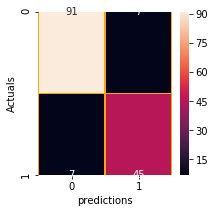

precision_score:  0.8653846153846154
recall_score:  0.8653846153846154
f1_score:  0.8653846153846154
Accuracy Score:   0.9066666666666666


In [40]:
# Confusion matrix

cm_knc = confusion_matrix(y_test,predict_test_knc)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_knc,annot = True,linewidths=0.5,linecolor="orange",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()


acu_score_knc = accuracy_score(y_test,predict_test_knc)
score_knc = knc.score(X_test,y_test)


print("precision_score: ", precision_score(y_test,predict_test_knc))
print("recall_score: ", recall_score(y_test,predict_test_knc))


print("f1_score: ",f1_score(y_test,predict_test_knc))

print("Accuracy Score:  ",acu_score_knc)

<b><font color='blue'>Visualize a Decision tree.

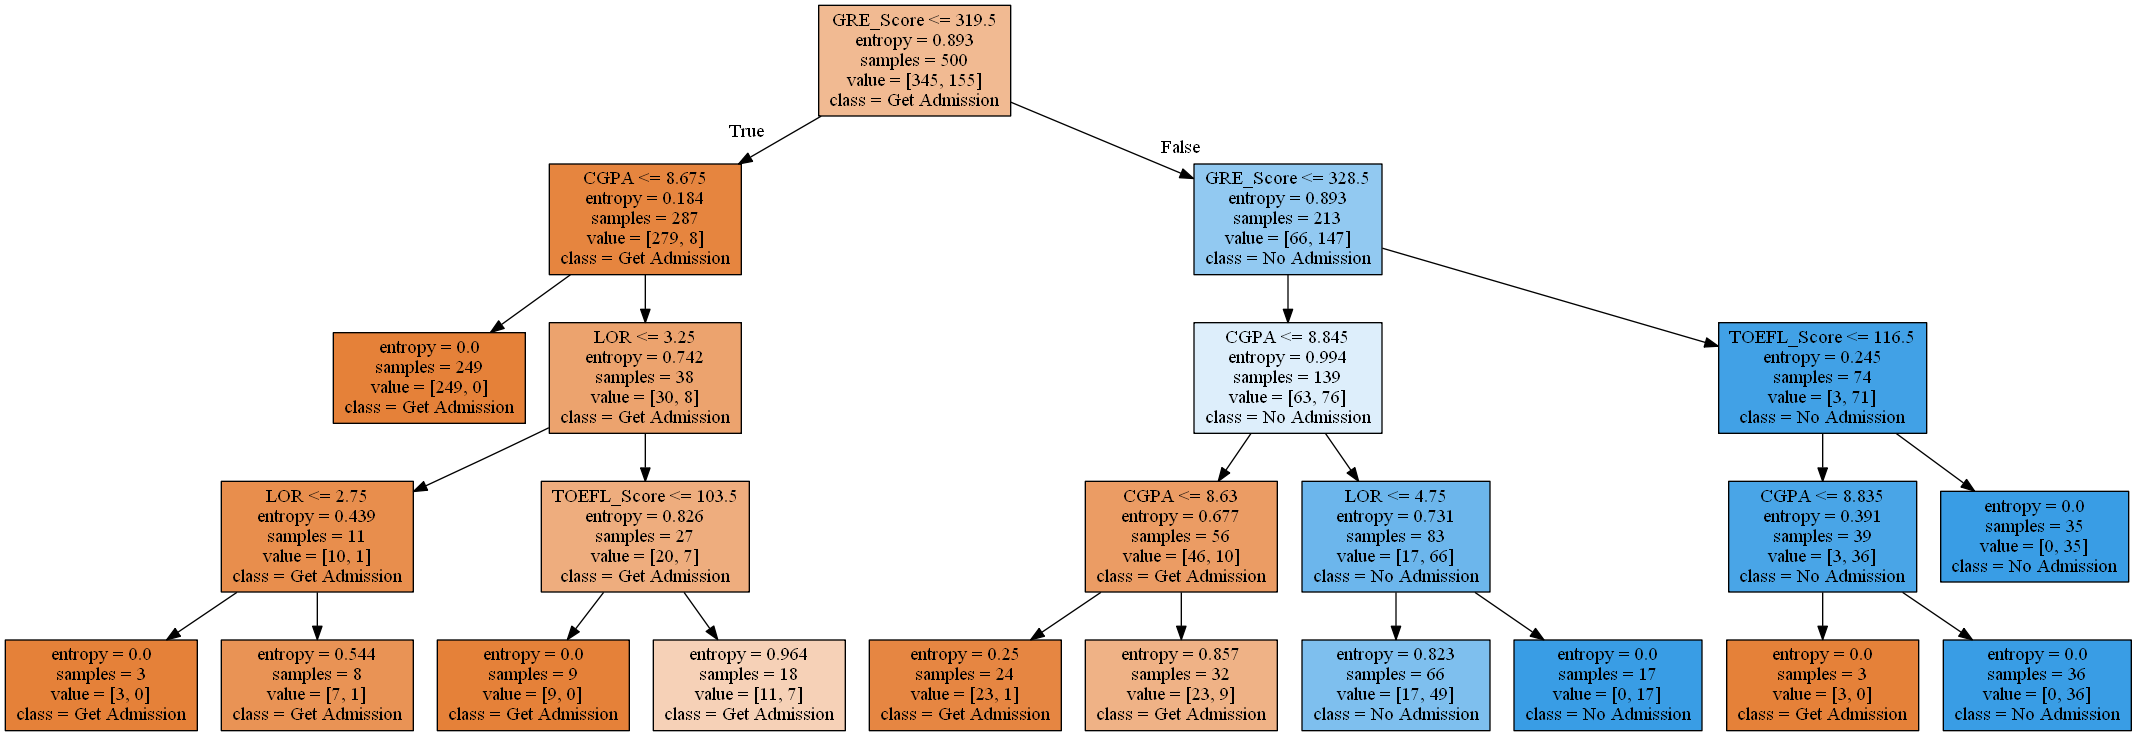

In [41]:
# Decision tree classifier.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Get Admission', 'No Admission'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



In [42]:
pred = decision_tree.predict(X)

<b><font color='blue'>Decision Tree Classifier.

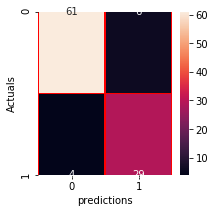

precision_score:  0.8285714285714286
recall_score:  0.8787878787878788
f1_score:  0.8529411764705883
Accuracy Score:   0.9


In [43]:
# Decision tree classifier.


X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 450)

dct = tree.DecisionTreeClassifier()
dct.fit(X_train,y_train)
predict_test_dct = dct.predict(X_test)

# Confusion matrix
cm_dct = confusion_matrix(y_test,predict_test_dct)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_dct,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

acu_score_dct = accuracy_score(y_test,predict_test_dct)
score_dct = dct.score(X_test,y_test)

print("precision_score: ", precision_score(y_test,predict_test_dct))
print("recall_score: ", recall_score(y_test,predict_test_dct))

print("f1_score: ",f1_score(y_test,predict_test_dct))

print("Accuracy Score:  ",acu_score_dct)


<b><font color='blue'>Ensemble modeling: RandomForestClassifier with Cross validation

In [44]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

score = cross_val_score(rfc, X, Y, cv=10)
print("Cross validation Score : ",score)
print("Variance : ",score.std()**2)

Cross validation Score :  [0.94117647 0.92156863 0.88235294 0.90196078 0.90196078 0.93877551
 0.91836735 0.91836735 0.95918367 0.89795918]
Variance :  0.0004864450782313724


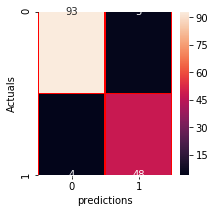

precision_score:  0.9056603773584906
recall_score:  0.9230769230769231
f1_score:  0.9142857142857143
Accuracy Score:   0.94


In [45]:
X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 450)

rfc1 = ensemble.RandomForestClassifier()
rfc1.fit(X_train,y_train)
predict_test_rfc = rfc1.predict(X_test)

# Confusion matrix
cm_rfc = confusion_matrix(y_test,predict_test_rfc)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

acu_score_rfc = accuracy_score(y_test,predict_test_rfc)
score_rfc = rfc1.score(X_test,y_test)

print("precision_score: ", precision_score(y_test,predict_test_rfc))
print("recall_score: ", recall_score(y_test,predict_test_rfc))

print("f1_score: ",f1_score(y_test,predict_test_rfc))

print("Accuracy Score:  ",acu_score_rfc)

<b><font color='blue'>Linear SVM

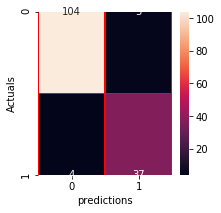

precision_score:  0.8809523809523809
recall_score:  0.9024390243902439
f1_score:  0.8915662650602411
Accuracy Score:   0.94


In [46]:
from sklearn.svm import SVC

# Instantiate our model and fit the data.
X = data[['GRE_Score','TOEFL_Score','CGPA','LOR']]
Y = data['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1424)

svm = SVC(kernel = 'linear')
svm.fit(X_train,y_train)
pred = svm.predict(X_test)

# Confusion matrix
cm_svc = confusion_matrix(y_test,pred)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_svc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

acu_score_svc = accuracy_score(y_test,pred)
score_svc = svm.score(X_test,y_test)

print("precision_score: ", precision_score(y_test,pred))
print("recall_score: ", recall_score(y_test,pred))

print("f1_score: ",f1_score(y_test,pred))

print("Accuracy Score:  ",acu_score_svc)


<b><font color='blue'>Naive Bayes

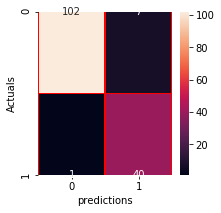

precision_score:  0.851063829787234
recall_score:  0.975609756097561
f1_score:  0.9090909090909092
Accuracy Score:   0.9466666666666667


In [47]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
# Instantiate our model and fit the data.
X = data[['GRE_Score', 'TOEFL_Score', 'LOR', 'CGPA',]]
Y = data['Chance_of_Admit']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1424)

nb = GaussianNB()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)

# Confusion matrix
cm_nb = confusion_matrix(y_test,pred)

# Visualization of Confusion matrix.
f, ax = plt.subplots(figsize =(3,3))
sns.heatmap(cm_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predictions")
plt.ylabel("Actuals")
plt.show()

acu_score_nb = accuracy_score(y_test,pred)
score_nb = nb.score(X_test,y_test)

print("precision_score: ", precision_score(y_test,pred))
print("recall_score: ", recall_score(y_test,pred))

print("f1_score: ",f1_score(y_test,pred))

print("Accuracy Score:  ",acu_score_nb)

<b><font color='blue'>Performance of all Classification models:

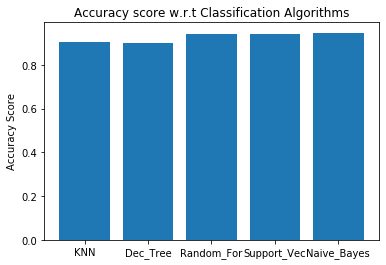

In [48]:
y1 = [acu_score_knc,acu_score_dct,acu_score_rfc,acu_score_svc,acu_score_nb]
x1 = ['KNN','Dec_Tree','Random_For','Support_Vec','Naive_Bayes']
plt.bar(x1,y1)
plt.ylabel("Accuracy Score")
plt.title("Accuracy score w.r.t Classification Algorithms")
plt.show()

<b>From the above, it is observed that all models have good accuracy. Among them, Naive Baye's has highest accuracy followed by  Random Forest and Support Vector Classifier.